# Introduction
This notebook explores data from LADOT's High-Injury Network (HIN), which highlights streets with the highest incidences of severe and fatal injury collisions in the City of LA. **LADOT's** description of the data is below:
> Even though the HIN represents just 6% of our total street mileage, it accounts for 65% of all deaths and severe injuries involving people walking. 
Strategic investments along the HIN will have the biggest effect in reducing death and severe injury on our streets.
Our methodology draws from the latest 5 years of traffic collision data. 
The HIN is the guiding document for prioritizing our efforts and the framework for achieving zero traffic deaths by 2025.

The dataset can be accessed [here](https://geohub.lacity.org/datasets/ladot::high-injury-network-2/about). 

# Data Exploration

**Step 1:** Import geopandas module so that I can import the spatial data and plot it on a map

In [3]:
import geopandas as gpd

**Step 2:** Import zipped shapefile of data 

In [4]:
high_injury_network = gpd.read_file('data/High_Injury_Network-shp.zip')

**Step 3:** I will find out how many rows and columns of data I have

In [5]:
high_injury_network.shape

(386, 8)

* This output shows me that I have 386 rows and 8 columns in this data set

**Step 4:** Next I will get more information about my data frame 

In [6]:
high_injury_network.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 386 entries, 0 to 385
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    386 non-null    int64   
 1   STNAME      386 non-null    object  
 2   Shape_Leng  386 non-null    float64 
 3   Shape_Le_1  386 non-null    float64 
 4   FROM_       371 non-null    object  
 5   TO_         371 non-null    object  
 6   GlobalID    386 non-null    object  
 7   geometry    386 non-null    geometry
dtypes: float64(2), geometry(1), int64(1), object(4)
memory usage: 24.2+ KB


* This output tells me the names of each of the 8 columns, that both the FROM_ and TO_ columns are msising 15 respones each, and that the types of data range from integers, floats, and strings. 

**Step 5:** Next, I will generate information for the first 5 rows of data 

In [7]:
high_injury_network.head()

,OBJECTID,STNAME,Shape_Leng,Shape_Le_1,FROM_,TO_,GlobalID,geometry
0,1,CENTURY BLVD,8086.422780,8086.422780,VERMONT AVE,AVALON BLVD,bb3983d2-6187-447e-9496-f91f9e1e47dc,"LINESTRING (-118.29183 33.94550, -118.28263 33..."
1,2,FIGUEROA ST,10094.733456,1.911881,COLORADO BLVD,AVENUE 61,acb098aa-5d7d-480f-804f-bb4e3731d37a,"LINESTRING (-118.18844 34.11174, -118.18831 34..."
2,3,103RD ST,5221.430950,5221.430950,CENTRAL AVE,GRAPE ST\r\nGRAPE,b6274f91-d568-49ff-91cf-5ff41e23afa4,"LINESTRING (-118.23689 33.94315, -118.23752 33..."
3,4,MARENGO ST,1031.346095,1031.346095,STATE ST,CUMMINGS ST,35ea94e3-3210-4610-bd16-5d6f8e37e7ce,"LINESTRING (-118.21017 34.05783, -118.20927 34..."
4,5,ALAMEDA ST,8611.911036,8611.911036,6TH ST,ALPINE ST\r\nALPINE,c9633073-47a3-4057-8023-c0467de5d6eb,"LINESTRING (-118.23630 34.06166, -118.23664 34..."


* The output shows the first 5 rows of data in the dataframe. We see the name of the street and the cross streets that the HIN spans too, as well as the their longitdue and latitude coordinates. 

**Step 6:**: This next step will plot the data 

<AxesSubplot:>

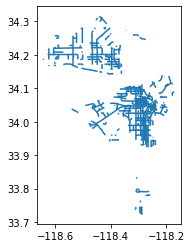

In [8]:
high_injury_network.plot()

* This output plotted the data with longitude along the y axis and latitude along the x-axis, depicting what we can see as a map of the HIN streets. 

**Step 7:** For this next step, I will find the value counts for the Street Name, and will determine how many collisions took place at each given street name. 

In [9]:
high_injury_network.columns.to_list()

['OBJECTID',
 'STNAME',
 'Shape_Leng',
 'Shape_Le_1',
 'FROM_',
 'TO_',
 'GlobalID',
 'geometry']

* Here the output shows a list of all column names, so I can determine which column I want to generate counts for

In [10]:
high_injury_network['STNAME'].value_counts()

VENTURA BLVD        6
SEPULVEDA BLVD      6
VICTORY BLVD        6
NORMANDIE AVE       6
FIGUEROA ST         5
                   ..
OLIVE ST            1
11TH ST             1
WESTMORELAND AVE    1
KENMORE AVE         1
22ND ST             1
Name: STNAME, Length: 229, dtype: int64

* This output tells us how many occurences of severe and fatal collisions took place at each street name. For example, we can see that Ventura Boulevard, Sepulved Blvd, Victory Blvd, and Normandie Ave all had six occurences of collisions. 

In [11]:
stname_count = high_injury_network['STNAME'].value_counts()

* I am now saving stname_count as a variable so that I can use it in further data exploration

In [12]:
stname_count

VENTURA BLVD        6
SEPULVEDA BLVD      6
VICTORY BLVD        6
NORMANDIE AVE       6
FIGUEROA ST         5
                   ..
OLIVE ST            1
11TH ST             1
WESTMORELAND AVE    1
KENMORE AVE         1
22ND ST             1
Name: STNAME, Length: 229, dtype: int64

* this is the output of the variable stname_count I just generated

** Step 8**: I am now plotting the stname_count variable to visually see the counts on a bar chart

<AxesSubplot:title={'center':'Number of Collisions per Street'}>

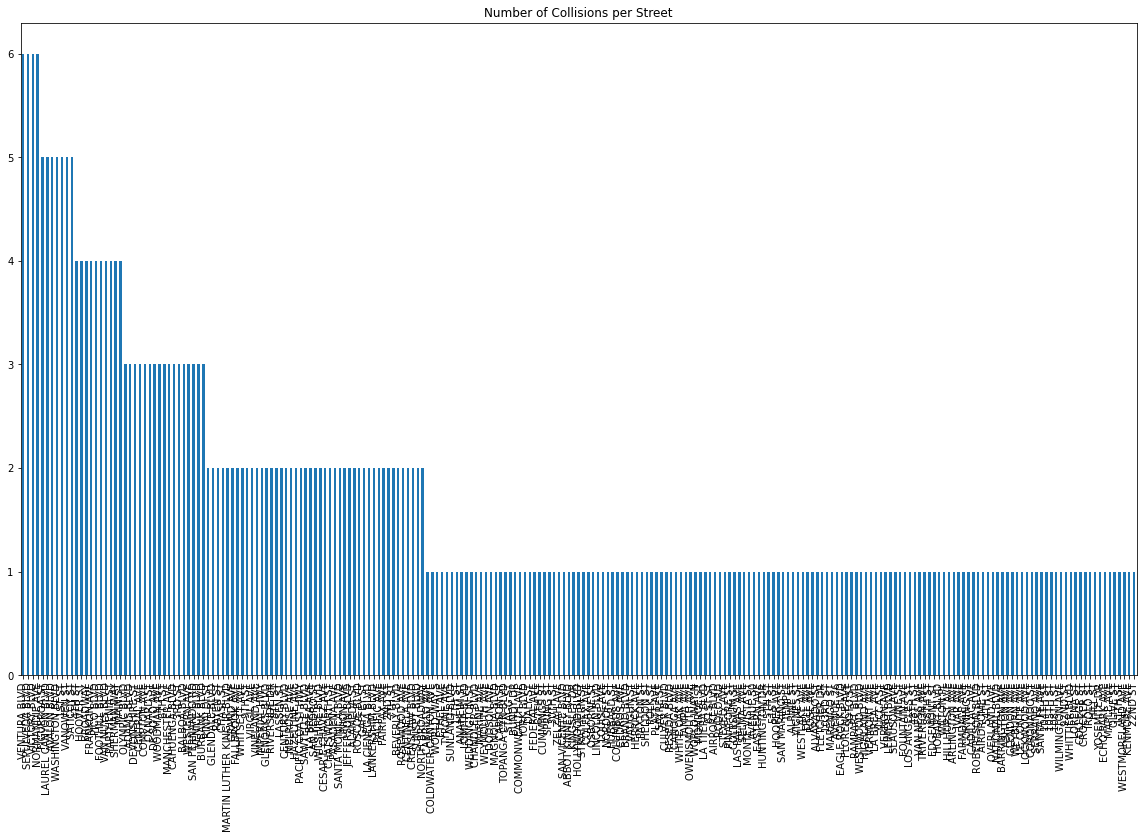

In [26]:
stname_count.plot.bar(
    figsize=(20,12), x = 'stname', y = 'count', title = 'Number of Collisions per Street')

* Here we see the number of collisions that took place at each street name.

**Step 9**: I'm going to trim the data to get rid of unnecessary columns to make it easier to query later on. 

In [27]:
high_injury_network.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 386 entries, 0 to 385
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    386 non-null    int64   
 1   STNAME      386 non-null    object  
 2   Shape_Leng  386 non-null    float64 
 3   Shape_Le_1  386 non-null    float64 
 4   FROM_       371 non-null    object  
 5   TO_         371 non-null    object  
 6   GlobalID    386 non-null    object  
 7   geometry    386 non-null    geometry
dtypes: float64(2), geometry(1), int64(1), object(4)
memory usage: 24.2+ KB


* The output here shows the columns and their names so I can decide which columns to get rid of.

In [44]:
desired_columns = ['STNAME', 'FROM_', 'TO_', 'geometry']
high_injury_network[desired_columns]

,STNAME,FROM_,TO_,geometry
0,CENTURY BLVD,VERMONT AVE,AVALON BLVD,"LINESTRING (-118.29183 33.94550, -118.28263 33..."
1,FIGUEROA ST,COLORADO BLVD,AVENUE 61,"LINESTRING (-118.18844 34.11174, -118.18831 34..."
2,103RD ST,CENTRAL AVE,GRAPE ST\r\nGRAPE,"LINESTRING (-118.23689 33.94315, -118.23752 33..."
3,MARENGO ST,STATE ST,CUMMINGS ST,"LINESTRING (-118.21017 34.05783, -118.20927 34..."
4,ALAMEDA ST,6TH ST,ALPINE ST\r\nALPINE,"LINESTRING (-118.23630 34.06166, -118.23664 34..."
...,...,...,...,...
381,FALLBROOK AVE,VICTORY BLVD,ROSCOE BLVD,"LINESTRING (-118.62347 34.21939, -118.62346 34..."
382,ROSCOE BLVD,TOPANGA CANYON,BALBOA BLVD,"LINESTRING (-118.59753 34.21980, -118.60608 34..."
383,DEVONSHIRE ST,None,None,"LINESTRING (-118.50354 34.25753, -118.50249 34..."
384,9TH ST,FIGUEROA ST,GLADYS AVE,"LINESTRING (-118.26284 34.04619, -118.26199 34..."


* The above selects two columns that I want to keep, STNAME, TO_, FROM_, and geometry, and then displays those columns in a dataframe

**Step 10**: Now I will save the trimmed data as a new variable

In [45]:
hin_trimmed = high_injury_network[desired_columns].copy()
hin_trimmed

,STNAME,FROM_,TO_,geometry
0,CENTURY BLVD,VERMONT AVE,AVALON BLVD,"LINESTRING (-118.29183 33.94550, -118.28263 33..."
1,FIGUEROA ST,COLORADO BLVD,AVENUE 61,"LINESTRING (-118.18844 34.11174, -118.18831 34..."
2,103RD ST,CENTRAL AVE,GRAPE ST\r\nGRAPE,"LINESTRING (-118.23689 33.94315, -118.23752 33..."
3,MARENGO ST,STATE ST,CUMMINGS ST,"LINESTRING (-118.21017 34.05783, -118.20927 34..."
4,ALAMEDA ST,6TH ST,ALPINE ST\r\nALPINE,"LINESTRING (-118.23630 34.06166, -118.23664 34..."
...,...,...,...,...
381,FALLBROOK AVE,VICTORY BLVD,ROSCOE BLVD,"LINESTRING (-118.62347 34.21939, -118.62346 34..."
382,ROSCOE BLVD,TOPANGA CANYON,BALBOA BLVD,"LINESTRING (-118.59753 34.21980, -118.60608 34..."
383,DEVONSHIRE ST,None,None,"LINESTRING (-118.50354 34.25753, -118.50249 34..."
384,9TH ST,FIGUEROA ST,GLADYS AVE,"LINESTRING (-118.26284 34.04619, -118.26199 34..."


* Here the new variable, hin_trimmed, displays just the four columns that we want to work with, STNAME, TO_, FROM_, and geometry.

**Step 11:** Now I will query the data. I want to see only collisions that occured at Ventura Blvd and then at Olive Street. 

In [46]:
hin_trimmed[hin_trimmed.STNAME == 'VENTURA BLVD']

,STNAME,FROM_,TO_,geometry
272,VENTURA BLVD,None,None,"LINESTRING (-118.37448 34.14186, -118.37439 34..."
273,VENTURA BLVD,COLDWATER CANYON AVE,CARPENTER AVE,"LINESTRING (-118.41374 34.14512, -118.41248 34..."
275,VENTURA BLVD,HAZELTINE AVE,WOODMAN AVE,"LINESTRING (-118.43997 34.14947, -118.43404 34..."
277,VENTURA BLVD,AMESTOY AVE,VAN NUYS BLVD,"LINESTRING (-118.50546 34.16024, -118.50112 34..."
288,VENTURA BLVD,WINNETKA AVE,WHITE OAK AVE,"LINESTRING (-118.57093 34.17096, -118.56865 34..."
289,VENTURA BLVD,TOPANGA CANYON BLVD,CANOGA AVE,"LINESTRING (-118.60584 34.16849, -118.60379 34..."


* The output here shows us the six collisions that took place at Ventura Blvd only. 

In [55]:
hin_trimmed[hin_trimmed.STNAME == 'OLIVE ST']

,STNAME,FROM_,TO_,geometry
143,OLIVE ST,PICO BLVD,12TH ST,"LINESTRING (-118.26329 34.03831, -118.26222 34..."


* This next query output shows that only one collision took place at Olive Street.

**Step 12**: Here I wanted to test if I could use my stname_count variable that I generated earlier to produce an output of a desired count number.

In [60]:
stname_count[stname_count == 4]

4TH ST           4
HOOVER ST        4
BROADWAY         4
FRANKLIN AVE     4
PICO BLVD        4
FOOTHILL BLVD    4
VAN NUYS BLVD    4
PARTHENIA ST     4
SHERMAN WAY      4
MAIN ST          4
Name: STNAME, dtype: int64

* here the output shows the street names that all occur 4 times!